<a href="https://colab.research.google.com/github/Grecia2727/Rep1_trivia/blob/master/02_Arboles_De_Decisi%C3%B3n_y_Bosques_Aleatorios_Ejercicio_Propuesto_solu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bosques aleatorios: Ejercicio Propuesto

Para este proyecto, exploraremos datos disponibles públicamente desde [LendingClub.com](www.lendingclub.com). Lending Club conecta a personas que necesitan dinero (prestatarios) con personas que tienen dinero (inversores). Es de esperar que, como inversor, desee invertir en personas que mostraron un perfil de alta probabilidad de reembolso. Intentaremos crear un modelo que ayude a predecir esto.

El club de préstamos tuvo un año muy interesante en 2016, así que vamos a ver algunos de sus datos y tener en cuenta el contexto. Esta información es de antes incluso de que se hiciera pública.

Utilizaremos datos de préstamos de 2007-2010 e intentaremos clasificar y predecir si el prestatario pagó o no su préstamo en su totalidad. Puede descargar los datos desde aquí o simplemente usar el csv ya proporcionado. Se recomienda que use la csv proporcionada ya que se ha limpiado los valores NA.

Esto es lo que representan las columnas:

Here are what the columns represent:
* credit.policy: 1 si el cliente cumple con los criterios de suscripción de crédito de LendingClub.com, y 0 en caso contrario.
* purpose: El propósito del préstamo (toma valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", y "all_other").
* int.rate: La tasa de interés del préstamo, como una proporción (una tasa del 11% se almacenaría como 0.11). A los prestatarios juzgados por LendingClub.com como más riesgosos se les asignan tasas de interés más altas.
* installment: Las cuotas mensuales adeudadas por el prestatario si el préstamo está financiado.
* log.annual.inc: El registro natural de los ingresos anuales auto reportados del prestatario.
* dti: La relación deuda-ingreso del prestatario (cantidad de deuda dividida por el ingreso anual).
* fico: El puntaje de crédito FICO del prestatario.
* days.with.cr.line: La cantidad de días que el prestatario ha tenido una línea de crédito.
* revol.bal: El saldo revolvente del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta de crédito).
* revol.util:La tasa de utilización de la línea revolvente del prestatario (la cantidad de la línea de crédito utilizada en relación con el crédito total disponible).
* inq.last.6mths: El número de consultas del prestatario por parte de los acreedores en los últimos 6 meses.
* delinq.2yrs: La cantidad de veces que el prestatario ha tenido más de 30 días de vencimiento en un pago en los últimos 2 años.
* pub.rec: El número de registros públicos derogatorios del deudor (declaraciones de bancarrota, gravámenes fiscales o juicios).
* not.fully.paid: 1 si el cliente no pago completamente la deuda, 0 en caso contrario

# Importación de Librerias

**Importe las bibliotecas habituales para pandas y trazado. Puede importar sklearn más adelante..**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenga los datos

** Use pandas para leer loan_data.csv como un dataframe llamado prestamos. **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5_ArbolDeDecision/loan_data.csv')

** Consulte prestamos con los métodos info (), head () y describe ().**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Análisis exploratorio de datos

Vamos a hacer algo de visualización de datos! Utilizaremos las capacidades de visualización de seaborn y pandas, pero puede usar la biblioteca que desee. No te preocupes por la coincidencia de colores, solo preocúpate por obtener la idea principal del gráfico.

** Cree un histograma de dos distribuciones FICO una encima de la otra, una para cada resultado credit.policy. **

*Nota: Esto es un tanto complicado, siéntase libre de referenciar las soluciones. Probablemente necesites una línea de código para cada histograma, también te recomiendo que uses pandas con .hist ()*

In [ ]:
loans['fico'].unique()

array([737, 707, 682, 712, 667, 727, 722, 677, 662, 767, 747, 702, 672,
       797, 772, 782, 802, 812, 742, 692, 777, 762, 757, 787, 717, 752,
       792, 627, 687, 697, 732, 822, 632, 807, 817, 827, 642, 647, 652,
       657, 637, 612, 617, 622])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b3740e9d0>,
      dtype=object)

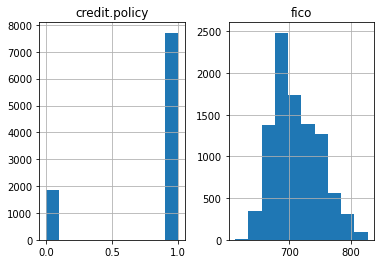

In [ ]:
loans[['credit.policy','fico']].hist()

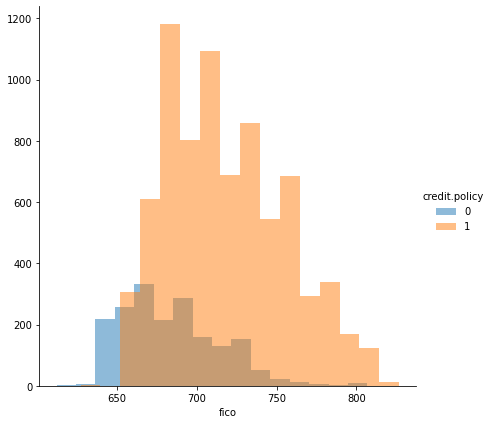

In [ ]:
g=sns.FacetGrid(data=loans,hue="credit.policy",height=6)
g=g.map(plt.hist,'fico',bins=16,alpha=0.5)
g.add_legend()

(array([   4.,   13.,  345.,  979., 1358., 1522., 1311.,  812., 1004.,
         818.,  593.,  416.,  258.,  133.,   12.]),
 array([612.        , 626.33333333, 640.66666667, 655.        ,
        669.33333333, 683.66666667, 698.        , 712.33333333,
        726.66666667, 741.        , 755.33333333, 769.66666667,
        784.        , 798.33333333, 812.66666667, 827.        ]),
 <a list of 15 Patch objects>)

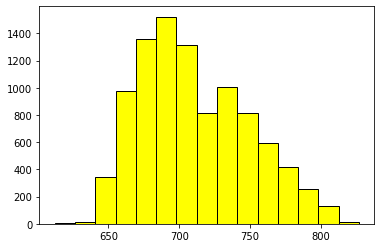

In [ ]:
plt.hist(loans['fico'], 15, color="yellow", ec="black")

** Crea una figura similar, excepto que esta vez con la columna not.fully.paid.**

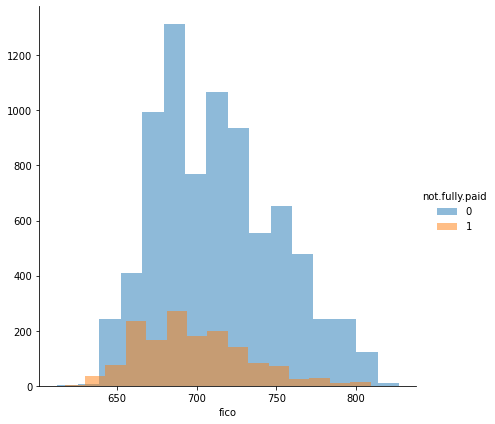

In [ ]:
g=sns.FacetGrid(data=loans,hue="not.fully.paid",height=6)
g=g.map(plt.hist,'fico',bins=16,alpha=0.5)
g.add_legend()

** Crea un countplot usando seaborn mostrando la canditad de préstamos por propósito, con el hue definido por not.fully.paid. **

In [ ]:
loans['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

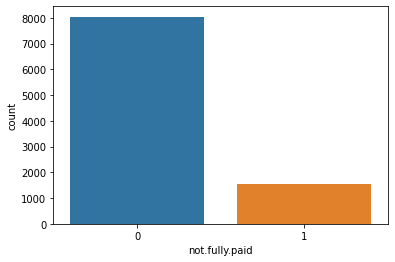

In [ ]:
sns.countplot(data=loans,x='not.fully.paid')

In [ ]:
cantprestamos = loans['purpose'].value_counts()
cantprestamos

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Text(0.5, 1.0, 'Cantidad de préstamos por propósito')

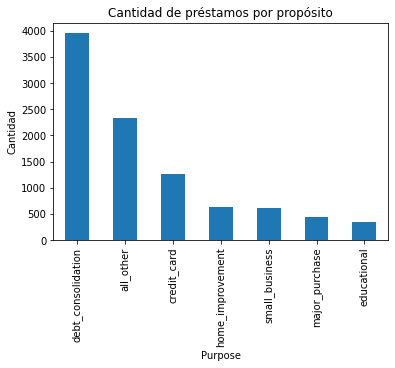

In [ ]:
cantprestamos.plot(kind = 'bar')
plt.xlabel('Purpose')
plt.ylabel('Cantidad')
plt.title('Cantidad de préstamos por propósito')

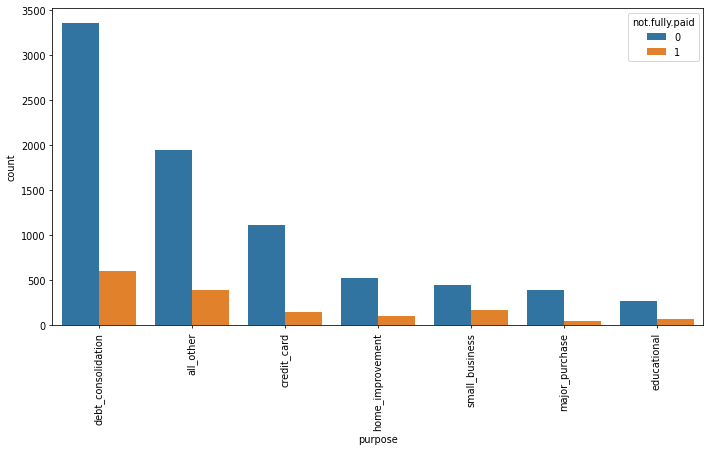

In [ ]:
plt.figure(figsize=(12,6),dpi=70)
sns.countplot(data=loans,x='purpose',
              order=loans['purpose'].value_counts().index,
             hue='not.fully.paid')
plt.xticks(rotation=90);

** Observemos la tendencia entre el puntaje FICO y la tasa de interés. Recrea el siguiente joinplot.**

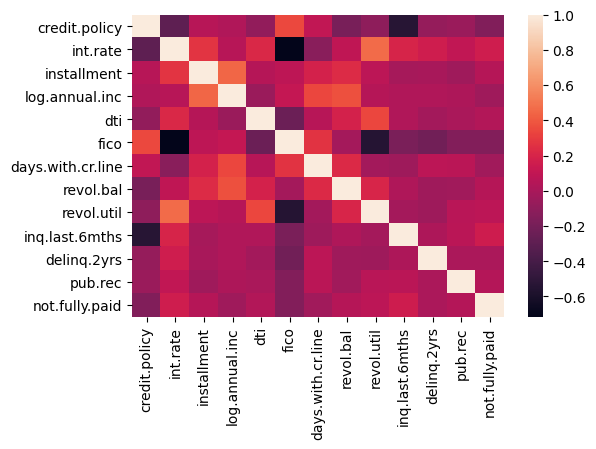

In [ ]:
plt.figure(dpi=100)
sns.heatmap(loans.corr())

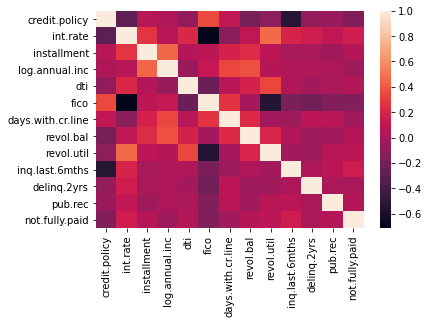

In [ ]:
sns.heatmap(loans.corr())

**Cree los siguientes lmplots para ver si la tendencia difiere entre not.fully.paid y credit.policy. Compruebe la documentación de lmplot () si no puede encontrar la forma de separarlo en columnas.**

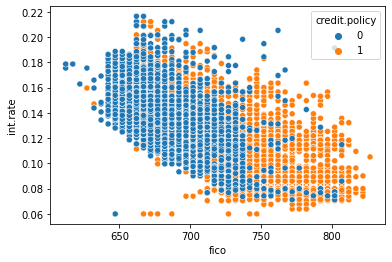

In [ ]:
sns.scatterplot(x="fico", 
 y="int.rate",
 hue="credit.policy",
 data = loans)

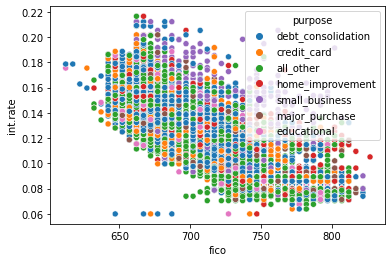

In [ ]:
sns.scatterplot(x="fico", 
 y="int.rate",
 hue="purpose",
 data = loans)

# Configuración de los datos

¡Prepárense para configurar nuestros datos para nuestro modelo de clasificación de bosques aleatorios!

**Aplique loans.info () nuevamente.**

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## Características categóricas

Observe que la columna ** purpose ** es categórica

Eso significa que tenemos que transformarlos usando variables dummy para que sklearn pueda entenderlos. Hagamos esto en un paso usando pd.get_dummies.

Le mostraremos una forma de tratar con estas columnas que, de ser necesario, se puede expandir a múltiples características categóricas.

**Crea una lista de 1 elemento que contiene la cadena 'propósito'. Llame a esta lista cat_feats.**


In [ ]:
lista_purpose =  ['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational']

In [ ]:
pd.get_dummies(loans)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [ ]:
cat_feats = pd.get_dummies(loans)

**Ahora use pd.get_dummies (loans, columns = cat_feats, drop_first = True) para crear un dataframe de mayor tamaño que tenga nuevas columnas de características con variables ficticias. Nombre a este dataframe como final_data**

In [ ]:
pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [ ]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)

In [ ]:
cat_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

## División en conjunto de entrenamiento y de prueba

¡Ahora es el momento de dividir nuestros datos en un conjunto de entrenamiento y un conjunto de pruebas!

** Use sklearn para dividir sus datos en un conjunto de capacitación y un conjunto de prueba como lo hemos hecho en el pasado. **

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = cat_feats.drop('not.fully.paid',axis=1)
y = cat_feats['not.fully.paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## Entrenando un Modelo de Árbol de Decisión

¡Comencemos entrenando primero un árbol de decisión único!

** Importar DecisionTreeClassifier **

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Cree una instancia de DecisionTreeClassifier () llamada dtree y ajústela a los datos de entrenamiento.**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=101)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

## Predicciones y Evaluación del Árbol de Decisión
** Cree predicciones a partir del conjunto de pruebas y cree un informe de clasificación y una matriz de confusión. **

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.73      2874



In [ ]:
print(confusion_matrix(y_test,predictions))

[[1958  473]
 [ 335  108]]


## Entrenando el modelo Random Forest

¡Ahora es el momento de entrenar a nuestro modelo!

** Cree una instancia de la clase RandomForestClassifier y ajústela a nuestros datos de entrenamiento del paso anterior. **

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600,random_state=101,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

## Predicciones y evaluación

Vamos a predecir los valores y_test y evaluar nuestro modelo.

** Predecir la clase not.fully.paid para los datos X_test. **

In [ ]:
rfc_pred = rfc.predict(X_test)

**Ahora crea un informe de clasificación a partir de los resultados. ¿Obtienes algo extraño o algún tipo de advertencia?**

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.71      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.78      0.51      0.48      2874
weighted avg       0.83      0.85      0.78      2874



**Muestra la matriz de confusión para las predicciones.**

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[2426    5]
 [ 431   12]]


**¿Qué funcionó mejor el bosque aleatorio o el árbol de decisión?**

In [ ]:
El bosque aleatorio tiene mejores resultados

# ¡Buen trabajo!